### Name : Harshvardhan Pandey
### Roll No : 60009220145

In [88]:
import pandas as pd
import numpy as np
import seaborn as sn
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor 

In [89]:
df=pd.read_excel('Data_train.xlsx')
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [90]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Cleaning the Data 

In [91]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [92]:
df = df.drop_duplicates()

In [93]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [94]:
df=df.dropna(subset=['Route','Total_Stops'])

In [95]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

We don't need Additional info and We already know the source , destination and stops . So Route is also not required 

In [96]:
df = df.drop(['Additional_Info'],axis=1)


## Feature Engineering 

- Converting the Date Columns into its proper datatype

In [97]:
df['Day_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format= "%d/%m/%Y").dt.day
df['Month_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format= "%d/%m/%Y").dt.month

In [98]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

C:\Users\santj\AppData\Local\Temp\ipykernel_18180\3804065798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\santj\AppData\Local\Temp\ipykernel_18180\3804065798.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [99]:
df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\santj\AppData\Local\Temp\ipykernel_18180\1324446684.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\santj\AppData\Local\Temp\ipykernel_18180\1324446684.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [100]:
df = df.drop(['Dep_Time','Arrival_Time','Date_of_Journey'],axis=1)

In [101]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


In [102]:
import re

def duration_hours(d):
    hours_match = re.search(r'(\d+)h', d)
    if hours_match:
        return int(hours_match.group(1))
    else:
        return 0

def duration_mins(d):
    mins_match = re.search(r'(\d+)m', d)
    if mins_match:
        return int(mins_match.group(1))
    else:
        return 0

df['Duration_hours'] = df['Duration'].apply(lambda x: duration_hours(x))
df['Duration_mins'] = df['Duration'].apply(lambda x: duration_mins(x))



In [103]:
df.head(7)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,11087,12,3,18,55,10,25,15,30


In [104]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [105]:
s='0 st'
s[:1]

'0'

In [106]:
def stops(value):
    if('n' in value):
        return 0
    else:
        return int(value[:1])
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : stops(x))

In [107]:
df['Total_Stops'].unique()


array([0, 2, 1, 3, 4], dtype=int64)

## Gaining insights through Graph

In [108]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [109]:
df['Month_of_Journey'].unique()

array([3, 5, 6, 4])

In [110]:
df['Route'].nunique()

128

- BLR : Banglore ,
BOM : Mumbai ,
DEL : Delhi ,
COK : Cochin ,
CCU : Kolkata ,
 

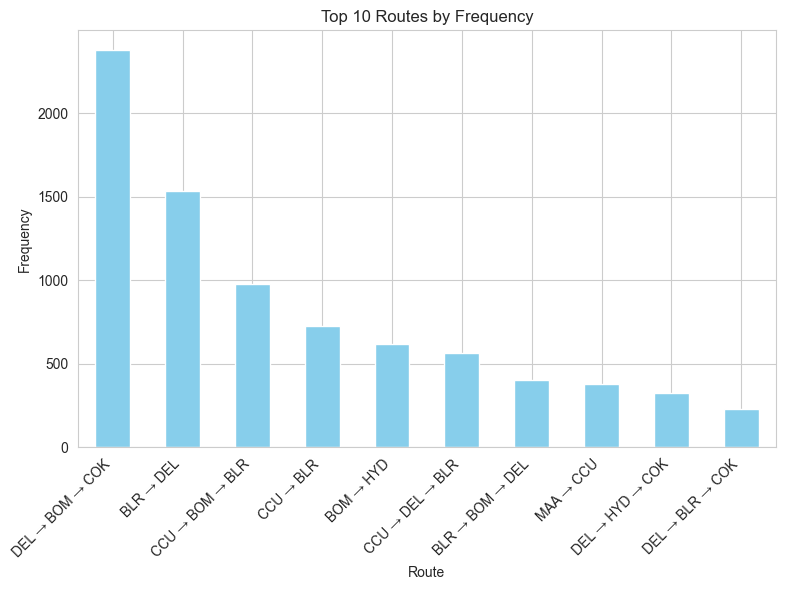

In [111]:
route_frequency = df['Route'].value_counts()

# Extract top 10 unique routes
top_10_routes = route_frequency.head(10)

# Plotting bar graph
plt.figure(figsize=(8, 6))
top_10_routes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Routes by Frequency')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

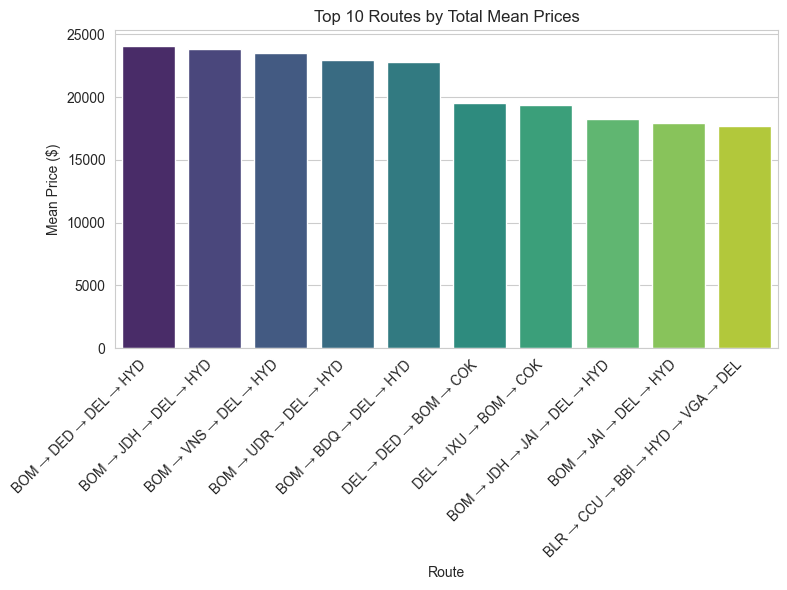

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

route_mean_prices = df.groupby('Route')['Price'].mean()

top_10_routes = route_mean_prices.nlargest(10).reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Route', y='Price', data=top_10_routes, palette='viridis')
plt.title('Top 10 Routes by Total Mean Prices')
plt.xlabel('Route')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


#### - Now you can see the Price Range of Each Month with Specific Airlines 

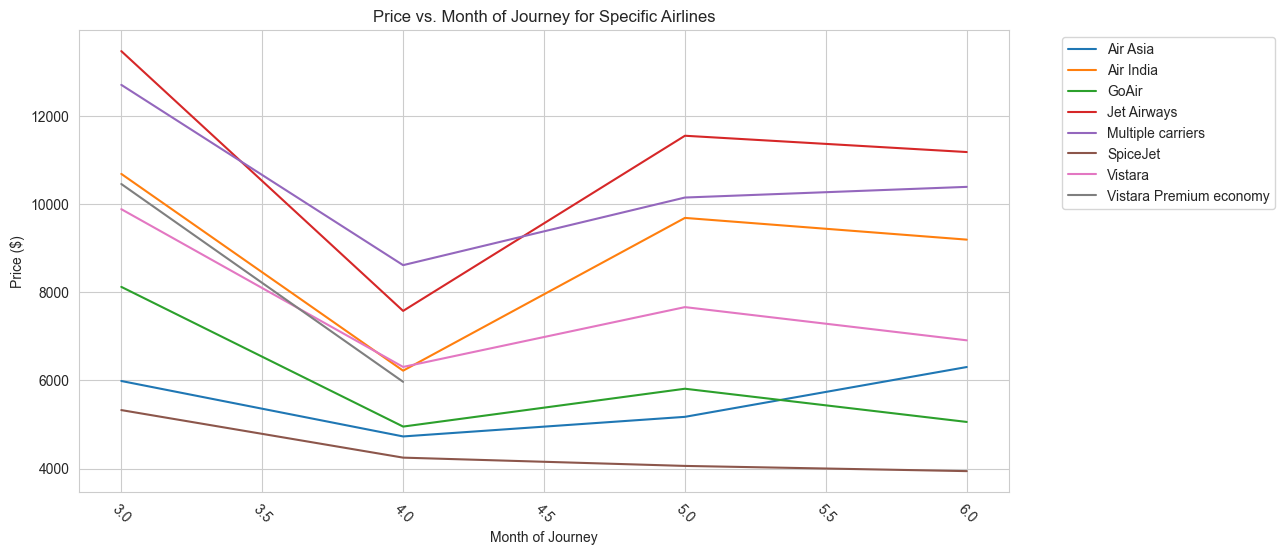

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for specific airlines
specific_airlines = ['Air India', 'Jet Airways', 'SpiceJet',
                     'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
                     'Vistara Premium economy']
df_specific = df[df['Airline'].isin(specific_airlines)]

# Calculate average price for each airline in each month
df_avg_price = df_specific.groupby(['Month_of_Journey', 'Airline'])['Price'].mean().reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_price, x='Month_of_Journey', y='Price', hue='Airline', markers=True)

plt.title('Price vs. Month of Journey for Specific Airlines')
plt.xlabel('Month of Journey')
plt.ylabel('Price ($)')
plt.xticks(rotation=-45)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [114]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Deciding what type of Encoding to use with the help of Graphs

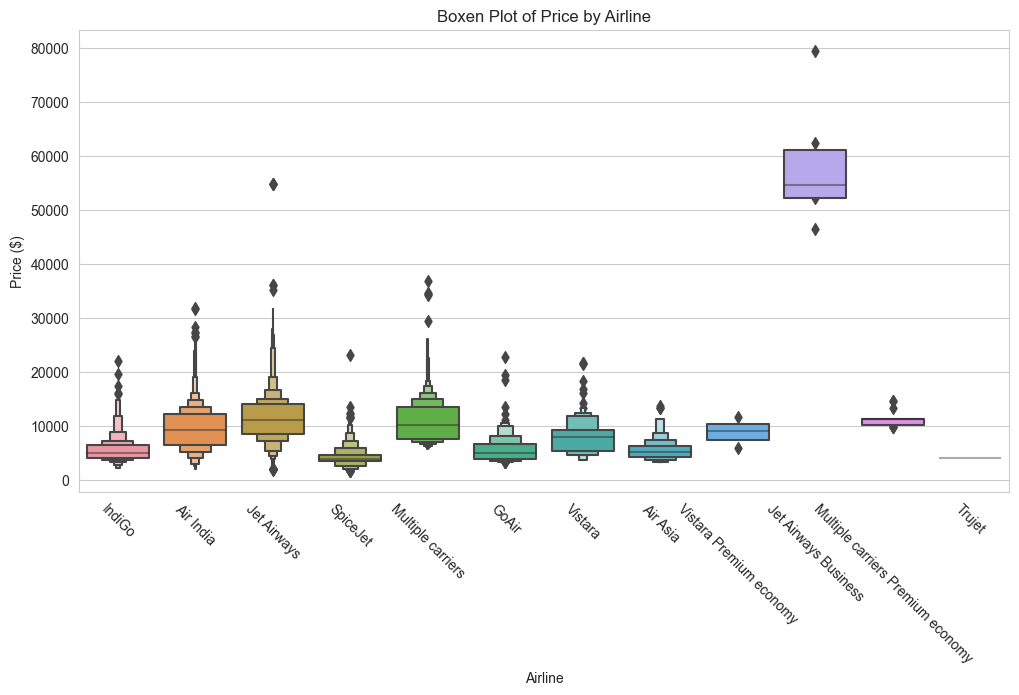

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, y='Price', x='Airline')

plt.title('Boxen Plot of Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price ($)')
plt.xticks(rotation=-45)  # Rotate x-axis labels for better readability

plt.show()



c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


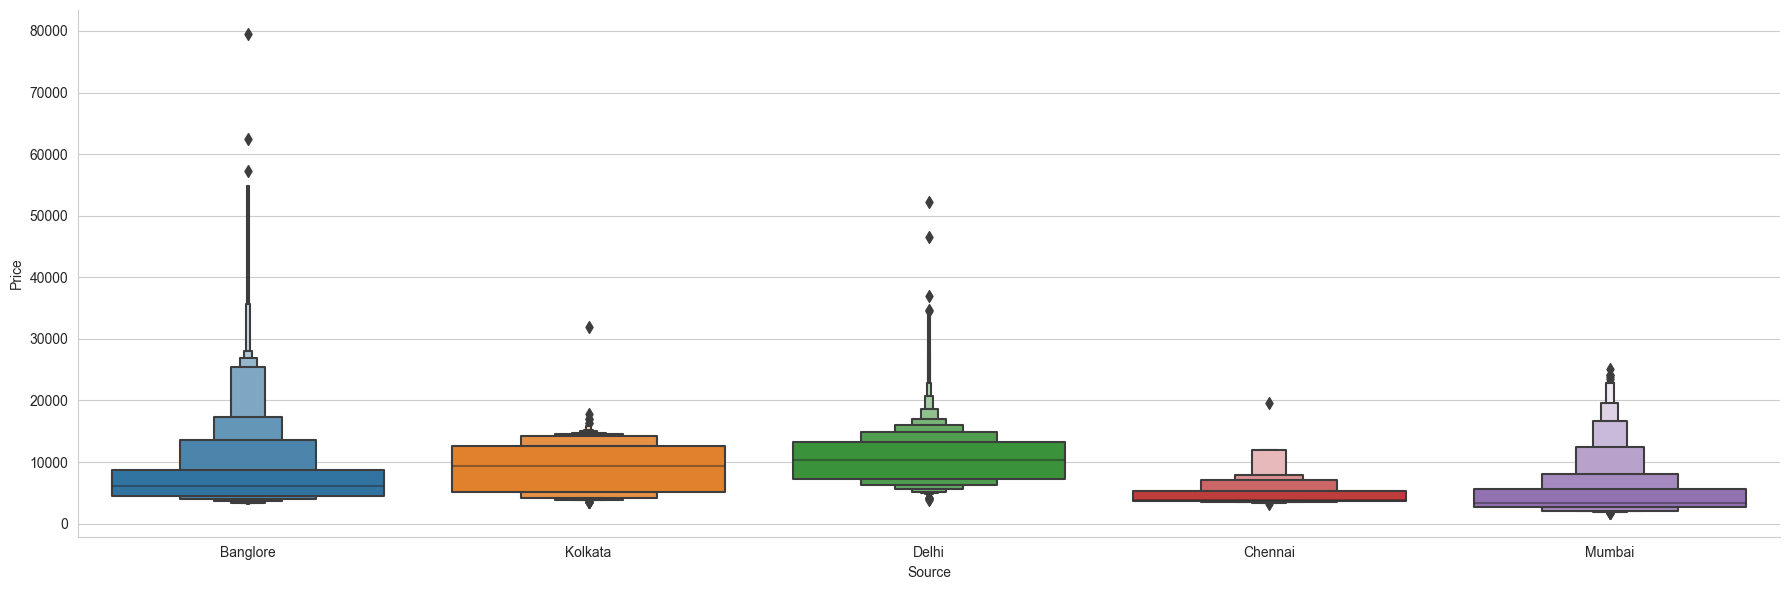

In [116]:
sn.catplot(y = "Price", x = "Source", data = df, kind="boxen", height = 6, aspect = 3)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


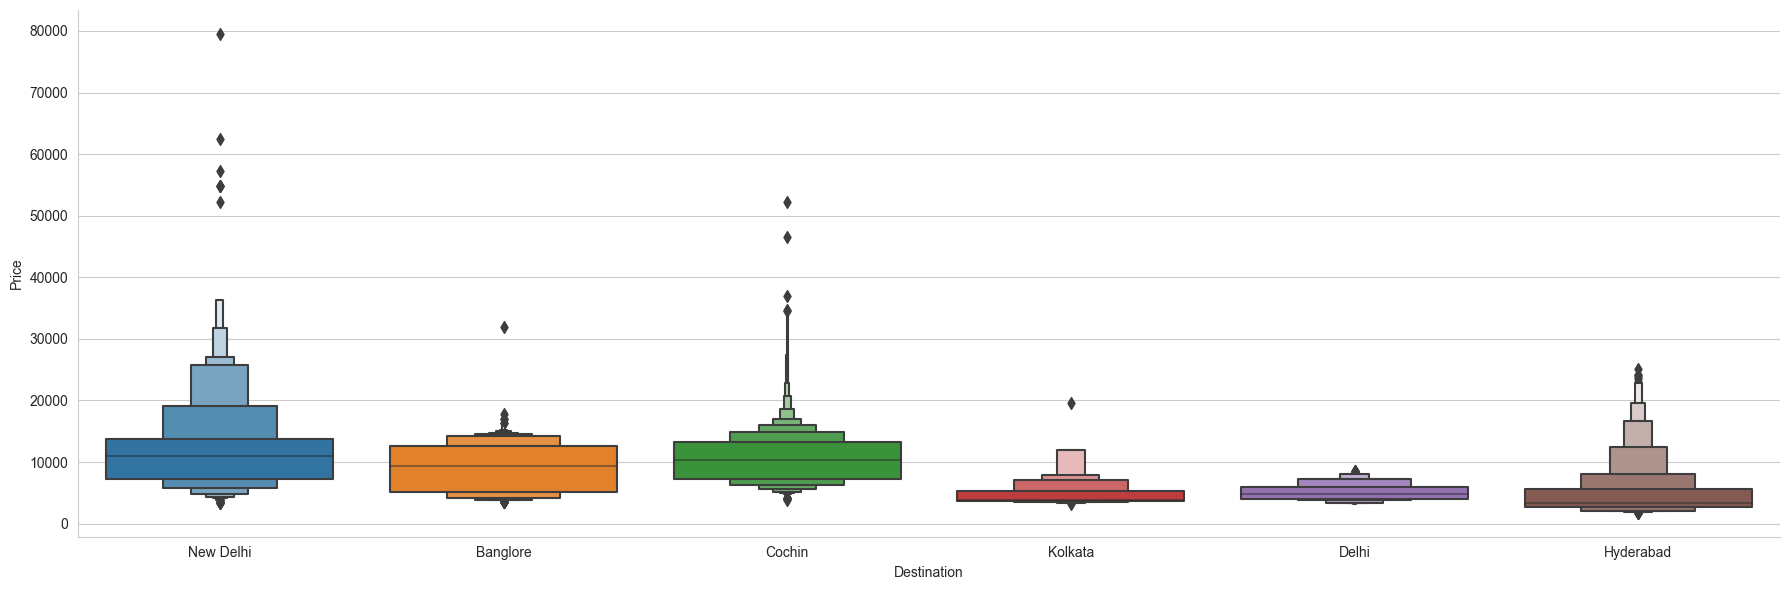

In [117]:
sn.catplot(y = "Price", x = "Destination", data = df, kind="boxen", height = 6, aspect = 3)

#### For all the three columns many of them have similar range and the minor differences between them are due to other factors so we will do Nominal Encoding on all the three features so that we'll get a better accuracy

In [118]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)


In [119]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,1,3,16,50,21,35,4,45


### - Dropping irrelevent columns 

In [120]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)
df = df.drop(['Airline','Source','Destination','Duration','Route'],axis=1)

In [121]:
df.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [122]:
df.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [123]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'],axis=1)
y = df[['Price']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [125]:
df.shape

(10462, 30)

## Modelling the Data 

#### - Using Suppor Vector Machine 

In [126]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Create Support Vector Regressor (SVR)
svr_regressor = SVR()

# Fit the model on training data
svr_regressor.fit(X_train_s, y_train.values.ravel())

# Make predictions
y_pred_svr = svr_regressor.predict(X_test_s)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared Score for Support Vector Regression (SVR):", r2_svr)


R-squared Score for Support Vector Regression (SVR): 0.06415719296214017


#### - Using Random Forests

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model on training data
rf_regressor.fit(X_train_s, y_train.values.ravel())  # Reshape y_train using ravel()

# Make predictions
y_pred_rf = rf_regressor.predict(X_test_s)

# Calculate R-squared score
r2_rf = r2_score(y_test.values.ravel(), y_pred_rf)  # Reshape y_test using ravel()
print("R-squared Score for Random Forest:", r2_rf)


R-squared Score for Random Forest: 0.813767882679975


#### - Using Adaboost Regessor 

In [128]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Create AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor()

# Fit the model on training data
adaboost_regressor.fit(X_train_s,y_train.values.ravel())

# Make predictions
y_pred_adaboost = adaboost_regressor.predict(X_test_s)

# Calculate R-squared score
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("R-squared Score for AdaBoost:", r2_adaboost)


R-squared Score for AdaBoost: 0.35065354519221814


#### - Using Gradient Boost Regessor 

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model on training data
gb_regressor.fit(X_train_s, y_train.values.ravel())

# Make predictions
y_pred_gb = gb_regressor.predict(X_test_s)

# Calculate R-squared score
r2_gb = r2_score(y_test, y_pred_gb)
print("R-squared Score for Gradient Boosting:", r2_gb)


R-squared Score for Gradient Boosting: 0.7579742232902047


#### - Using XGBoost Regressor 

In [130]:
import xgboost as xgb

# Create XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

# Fit the model on training data
xgb_regressor.fit(X_train_s, y_train)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_test_s)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared Score for XGBoost:", r2_xgb)


R-squared Score for XGBoost: 0.8389344423788904


In [131]:
# {'n_estimators': 100,
#  'min_samples_split': 5,
#  'min_samples_leaf': 1,
#  'max_features': 'sqrt',
#  'max_depth': 17}

 # These parametersgave us an accuracy above 83

In [132]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(r2_xgb, file)
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)